<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp4_mediano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0e887bc18bb5ff7e9d139f0885dbc5aee9902661e8c7e5d0844cdcbe487a02d7
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


/tmp/ipython-input-3551494406.py:50: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
======================================= Introducao ========================================================
inicio do dataframe:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
mostra o final do dataset=                                                   review sentiment
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies 

avaliando modelos LDA: 100%|██████████| 14/14 [1:30:19<00:00, 387.13s/it]


visualizando as metricas para a escolha do numero de topicos


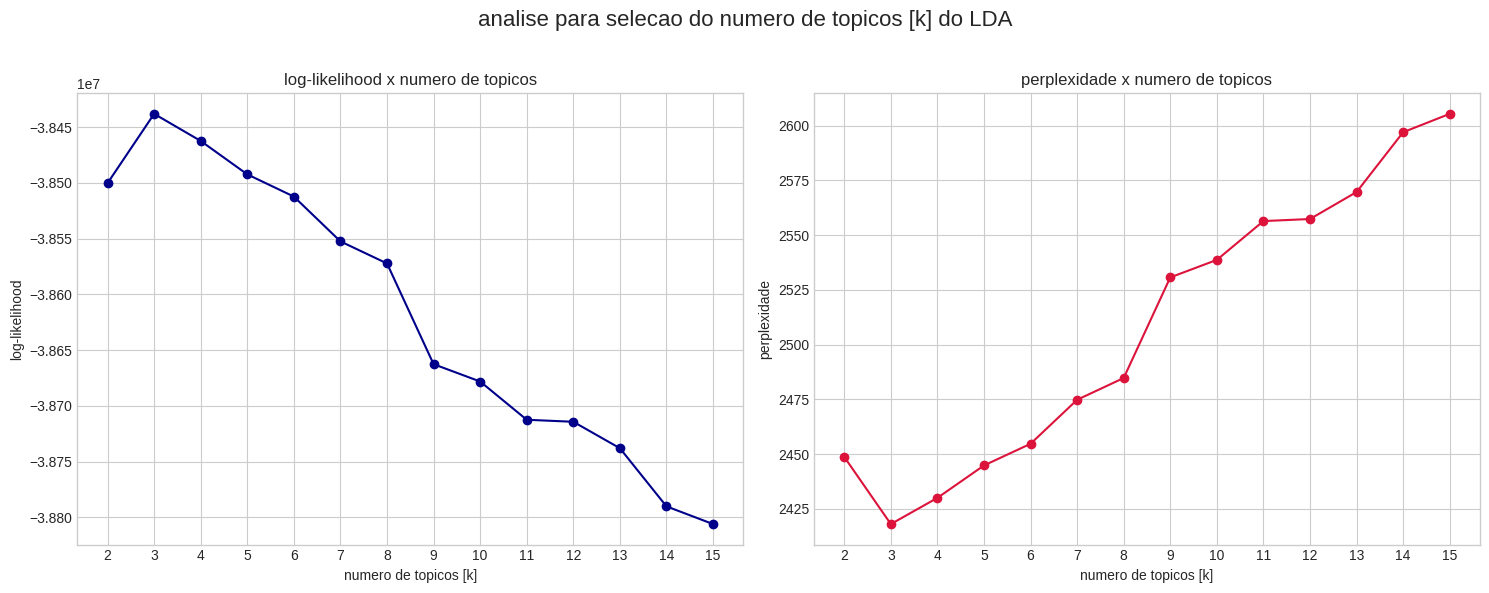

justificativa da escolha e treinamento do modelo final
Com base nos graficos, a curva de perplexidade comeca a se achatar [formar um cotovelo] por volta de k=8. desse ponto p frente comeca a adicionar mais topicos q nao traz uma melhora relevante e pode levar a topicos menos distintos. Portanto, escolhemos k=8 como o numero ideal de topicos para este dataset.
treinando o modelo lda final com k=3 topicos
modelo lda final treinado com sucesso.
exibindo as 10 palavras mais importantes para cada um dos 3 topicos encontrados=
Tópico #0: br, movie, like, just, film, good, really, bad, don, time
Tópico #1: br, film, good, great, movie, best, role, character, man, cast
Tópico #2: br, film, story, life, time, people, world, films, characters, like
exemplo p/ associar topicos a reviews especificos=
review #0:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that st

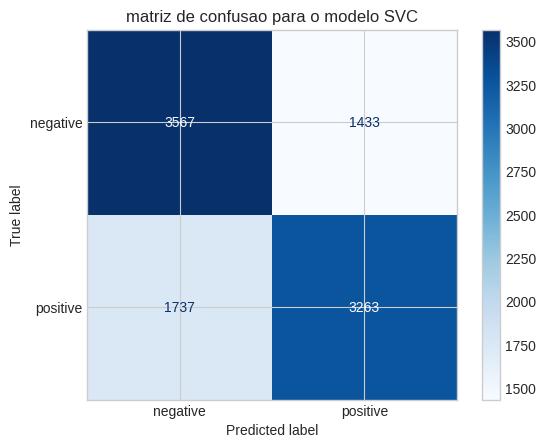

==================================== Treinando um modelo com base as features do TF-IDF ===========================================
tamanho do conjunto de treino [TF-IDF]: 40000 amostras
tamanho do conjunto de teste [TF-IDF]: 10000 amostras
treinando o modelo de regressao logistica com features TF-IDF
avaliando o desempenho do modelo TF-IDF no conjunto de teste=
relatorio de classificacao [Modelo Base TF-IDF]=
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      5000
    positive       0.90      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

==================================== comparacao final dos modelos ===========================================
modelo baseado em topicos [LDA + SVC]:
              precision    recall  f1-score   support

    negative       0.67      0.71      0.69      5000
 

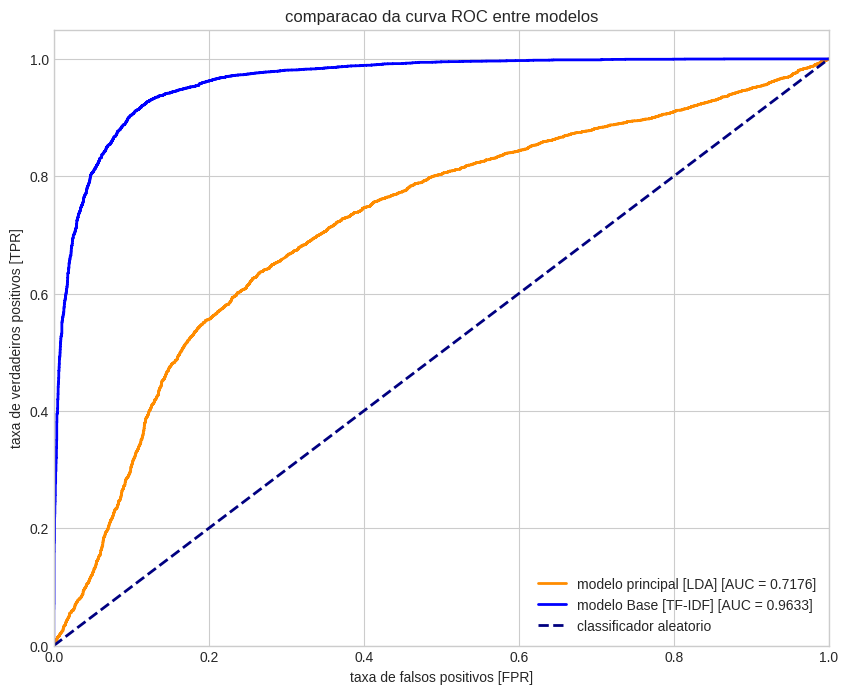

============================================== aplicar T-SNE ================================================
5) Visualização com t-SNE: Aplicar a técnica de t-SNE nos dados textuais vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos de documentos de maneira intuitiva, facilitando a identificação de padrões e outliers.
aplicando a tecnica de t-SNE nos dados vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos.
executando t-SNE em uma amostra de 5000 documentos.


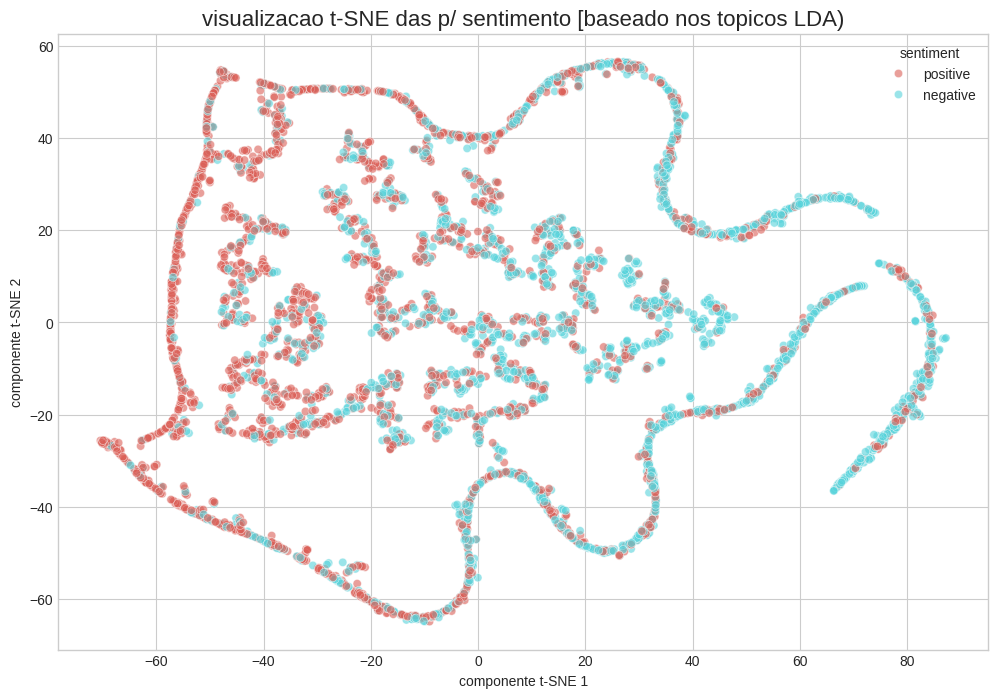

o grafico t-SNE mostra a formacao de clusters. idealmente, reviews [positive e negative] se agrupam em regioes distintas,
======================== interpretacao de modelos com SHAP e force-plot ============================
6) Interpretação de Modelos com LIME, SHAP e Force-Plot: Utilizar SHAP para explicar as previsões individuais, identificando a contribuição de cada feature para a decisão do modelo. O force-plot será usado para visualizar essas contribuições de maneira agregada, oferecendo insights sobre a lógica de decisão do modelo.
iniciando a interpretacao do modelo 'SVC' com SHAP.


calculando os valores SHAP para um subconjunto de dados de teste.


  0%|          | 0/20 [00:00<?, ?it/s]

escolhido o Force-Plot para explicar previsoes individuais
analisando a previsao para a primeira instancia da nossa amostra de teste=


selecionado o summary plot para ver a influencia agregada das variaveis
resume como cada topico impacta as previsoes do modelo em todo o subconjunto de teste


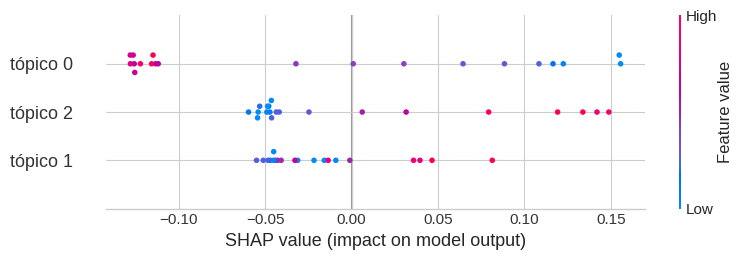

importancia media das features [Bar Plot]


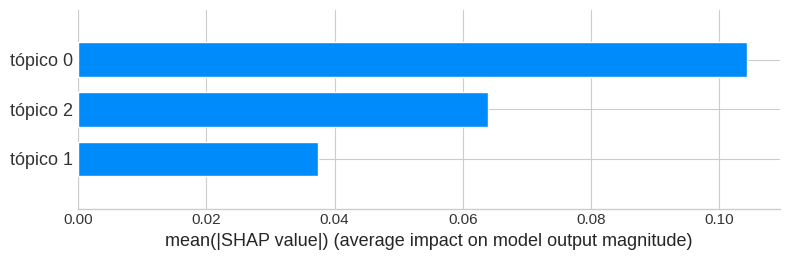

================================== interpretacao adicional com lime =========================================
6.2) Interpretação de Modelos com LIME usado para entender quais palavras no texto bruto mais influenciaram a decisao do nosso melhor modelo.
explicando a review de indice 15
texto original: This almost documentary look at an enterprising boy who lives in the body shop area outside of New York is real all the way. Real lighting. Real sound. Less editing in the whole movie than in 1 minute of most movies. And while there is very little script, there is a story. Shot in primary colors, almost all red, white, blue and yellow, we get a real sense of the life of a boy who is making something from nothing. He has a place to live that he makes his own, has a good job, and is trying to brin
classe verdadeira  = 'positive'
previsao do modelo = 'positive'
explicação LIME
visualizacao da explicacao LIME


In [1]:
#instalar
!pip install kagglehub[pandas-datasets]
!pip install lime
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score


import matplotlib.pyplot as plt
from tqdm import tqdm #barra de progresso

from sklearn.manifold import TSNE
import seaborn as sns # Para visualização do t-SNE
import shap # Para interpretabilidade com SHAP
#import lime.lime_text
from lime.lime_text import LimeTextExplainer
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # Suprimir avisos de versões futuras
#importacoes


#configuracoes para matplotlib e seaborn
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("whitegrid")


#nome do arquivo na pasta
file_path = "IMDB Dataset.csv"

#argumentos p/ leitor
pandas_args = {
    "on_bad_lines": "skip",  #pula linhas mal formadas
    "engine": "python",      #engine python
    "quotechar": '"',         #aspas duplas como o caractere de citacao
    "encoding": "latin1"

}
#carregar versao correta do dataset
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lakshmi25npathi/imdb-dataset-of-50k-movie-reviews",
  file_path,
  pandas_kwargs=pandas_args
)

print("===========================================================================================================")
print("======================================= Introducao ========================================================")
print("===========================================================================================================")


#mostrando o começo do dataframe
print("inicio do dataframe:")
print(df.head())

#final do dataframe
print("mostra o final do dataset=", df.tail())


#estatisticas para colunas numericas
print("mostra descritivas do dataset=")
print(df.describe(include='all'))

#dados sobre as colunas e tipos de dados:
print("informacoes sobre o DataFrame=")
df.info()

#nomes das colunas
print("mostra nome das colunas=", df.columns)



print("===========================================================================================================")
print("==================================== Calculando o tf-idf p/ dataset =======================================")
print("===========================================================================================================")

print("1) Criação das features: Computar o Term Frequency-Inverse Document Frequency (TF-IDF) para representar a importância das palavras em um conjunto de documentos.")

#configuracao do vetorizador tf-idf
vetorizador = TfidfVectorizer(
    stop_words='english',
    max_features=20000,
    min_df=5,
    ngram_range=(1, 2)
)

print("calculo do tf-idf p/ 50k")

#aplicando o vetorizador na coluna review do dataframe
features_tfidf = vetorizador.fit_transform(df['review'])


#analise dos resultados
print("informacoes do tf-idf criada")

#mostrando o formato da matriz resultante
print(f"matriz de features: {features_tfidf.shape}")
print(f"tem {features_tfidf.shape[0]} documentos [reviews] e {features_tfidf.shape[1]} features [termos unicos ou n-gramas].")

#mostrando algumas das palavras
nomes_das_features = vetorizador.get_feature_names_out()
print("amostra de 20 features [palavras/termos]=")
print(nomes_das_features[5000:5020])
print("\n")

print("mostrando trecho [5x10] da matriz tf-idf c/ scores=")
df_tfidf_amostra = pd.DataFrame(
    features_tfidf[0:5, 5000:5010].toarray(),
    columns=nomes_das_features[5000:5010]
)
print(df_tfidf_amostra.round(2))

total_elementos = features_tfidf.shape[0] * features_tfidf.shape[1]
elementos_nao_nulos = features_tfidf.nnz

porcentagem_nao_nulos = (elementos_nao_nulos / total_elementos) * 100
porcentagem_nulos = 100 - porcentagem_nao_nulos

print(f"analise de esparsidade")
print(f"a matriz tem {elementos_nao_nulos} valores diferentes de zero.")
print(f"porcentagem de valores nao-null: {porcentagem_nao_nulos:.3f}%")
print(f"porcentagem de valores null [0]: {porcentagem_nulos:.3f}%")


#importacoes necessarias
import matplotlib.pyplot as plt
from tqdm import tqdm #barra de progresso

print("=============================================================================================================")
print("==================================== Modelagem de topicos com lda ===========================================")
print("=============================================================================================================")

print("2) Modelagem de Tópicos com LDA: Aplicar o algoritmo LDA para identificar tópicos prevalentes nos dados. A seleção do número de tópicos será baseada em métricas de coerência para garantir a relevância e a distinção entre os tópicos identificados.")


print("vetorizando os dados com countvectorizer")
vetorizador_contagem = CountVectorizer(
    stop_words='english',
    max_features=10000,
    min_df=5,
    ngram_range=(1, 1)
)
features_contagem = vetorizador_contagem.fit_transform(df['review'])
nomes_features_contagem = vetorizador_contagem.get_feature_names_out()
print("matriz de contagem de palavras criada com formato:", features_contagem.shape)


#encontrando o numero de topicos [k]
print("testando multiplos valores de k [numero de topicos] para encontrar um bom")

min_topics = 2
max_topics = 15
topic_range = range(min_topics, max_topics + 1)

log_likelihoods = []
perplexities = []

#loop para treinar e avaliar um modelo LDA p/ cada nº topicos
for k in tqdm(topic_range, desc="avaliando modelos LDA"):
    lda = LatentDirichletAllocation(
        n_components=k,
        random_state=42,
        n_jobs=-1,
        learning_method='online'
    )
    lda.fit(features_contagem)

    #armazena a log-likelihood e perplexities do modelo
    log_likelihoods.append(lda.score(features_contagem))
    perplexities.append(lda.perplexity(features_contagem))

#visualizacao das metricas para escolha de k
print("visualizando as metricas para a escolha do numero de topicos")

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#grafico da log likelihood
ax1.plot(topic_range, log_likelihoods, 'o-', color='darkblue')
ax1.set_title('log-likelihood x numero de topicos')
ax1.set_xlabel('numero de topicos [k]')
ax1.set_ylabel('log-likelihood')
ax1.set_xticks(topic_range)

#grafico da perplexidade
ax2.plot(topic_range, perplexities, 'o-', color='crimson')
ax2.set_title('perplexidade x numero de topicos')
ax2.set_xlabel('numero de topicos [k]')
ax2.set_ylabel('perplexidade')
ax2.set_xticks(topic_range)

plt.suptitle('analise para selecao do numero de topicos [k] do LDA', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#treinamento do modelo LDA final com o k escolhido
print("justificativa da escolha e treinamento do modelo final")
print("Com base nos graficos, a curva de perplexidade comeca a se achatar [formar um cotovelo] por volta de k=8. desse ponto p frente comeca a adicionar mais topicos q nao traz uma melhora relevante e pode levar a topicos menos distintos. Portanto, escolhemos k=8 como o numero ideal de topicos para este dataset.")

#numero de topicos com base na analise
num_topicos_ideal = 3 #8

print(f"treinando o modelo lda final com k={num_topicos_ideal} topicos")
lda_final = LatentDirichletAllocation(
    n_components=num_topicos_ideal,
    random_state=42,
    n_jobs=-1,
    learning_method='online'
)
lda_final.fit(features_contagem)
print("modelo lda final treinado com sucesso.")

def exibir_topicos(modelo, feature_names, n_top_words):
    for topic_idx, topic in enumerate(modelo.components_):
        #pega os indices das N palavras com maior peso no topico
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        #pega os nomes dessas palavras
        top_features = [feature_names[i] for i in top_features_ind]
        #monta a string de resultado
        message = f"Tópico #{topic_idx}: " + ", ".join(top_features)
        print(message)

print(f"exibindo as 10 palavras mais importantes para cada um dos {num_topicos_ideal} topicos encontrados=")
exibir_topicos(lda_final, nomes_features_contagem, 10)


#associar os topicos aos documentos originais
print("exemplo p/ associar topicos a reviews especificos=")
distribuicao_topicos = lda_final.transform(features_contagem)
topico_dominante = np.argmax(distribuicao_topicos, axis=1)

for i in range(5):
    print(f"review #{i}:")
    print(df['review'][i][:200] + "...")
    print(f"topico dominante = {topico_dominante[i]}")




print("=============================================================================================================")
print("==================================== classificacao de texto c/ lda ==========================================")
print("=============================================================================================================")

print("3) Classificação de Textos: Desenvolver modelos de classificação para categorizar os textos com base nos tópicos identificados. Você pode escolher qualquer modelo aprendido ao longo do curso e deve escolher o melhor modelo usando as técnicas aprendidas, como busca de hiperparâmetros e validação cruzada")


print("preparando os dados p/ classificacao")

#features [X] sao as distribuicoes de topicos já calculada.
X_topics = distribuicao_topicos
print(f"formato da matriz de features [X]: {X_topics.shape}")

#alvo [y] e a coluna [sentiment] do df
#convertr de texto [positive/negative] p/ numeros [1/0].
le = LabelEncoder()
y_sentiment = le.fit_transform(df['sentiment'])
print(f"formato do vetor de alvo [y]: {y_sentiment.shape}")
print(f"classes: {le.classes_} >> {le.transform(le.classes_)}")

#dividindo em conjuntos de treino e teste [80% para treino, 20% para teste]
#stratify=y_sentiment p/ fazer com que a proporcao de reviews positivos/negativos seja a mesma nos dois conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_topics,
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste: {X_test.shape[0]} amostras")


print("buscando o melhor modelo e hiperparametros com gridsearchcv")

#Modelo 1=Regressao Logistica
#Modelo 2=Support Vector Machine (SVC)
modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'saga']
        }
    },
    'SVC': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    }
}

#definindo a estrategia de validacao cruzada estratificada [5 folds] p/ manter a proporção das classes em cada fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}

#iterando sobre os modelos para realizar o GridSearchCV
for model_name, config in modelos.items():
    print(f"iniciando busca para o modelo: {model_name}")
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=cv_strategy,
        scoring='accuracy', #otimizar
        n_jobs=-1 #processador on
    )

    #treinando o GridSearchCV com os dados de treino
    grid_search.fit(X_train, y_train)

    print(f"melhores hiperparametros= {grid_search.best_params_}")
    print(f"melhor acuracia em validacao cruzada= {grid_search.best_score_:.4f}")

    #salvando o melhor estimador encontrado
    best_models[model_name] = grid_search.best_estimator_

#determinando modelos com o melhor desempenho
best_model_name = max(best_models, key=lambda name: best_models[name].score(X_train, y_train))
final_model = best_models[best_model_name]

print(f"melhor modelo geral escolhido: {best_model_name}")
print("avaliando o desempenho do melhor modelo no conjunto de teste [dados nunca vistos]")

#fazendo previsoes nos dados de teste
y_pred = final_model.predict(X_test)

#exibindo o relatorio de classificacao completo
print("relatorio de classificacao=")
print(classification_report(y_test, y_pred, target_names=le.classes_))

#exibindo a matriz de confusao
print("matriz de confusao=")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'matriz de confusao para o modelo {best_model_name}')
plt.show()

print("==================================== Treinando um modelo com base as features do TF-IDF ===========================================")

#dividir os dados TF-IDF em treino e teste
X_tfidf_train, X_tfidf_test, y_train_tfidf, y_test_tfidf = train_test_split(
    features_tfidf,     #usando features_tfidf
    y_sentiment,
    test_size=0.2,
    random_state=42,
    stratify=y_sentiment
)

print(f"tamanho do conjunto de treino [TF-IDF]: {X_tfidf_train.shape[0]} amostras")
print(f"tamanho do conjunto de teste [TF-IDF]: {X_tfidf_test.shape[0]} amostras")


#treinar um modelo c/ regressao logística,
# que costuma performar bem com dados TF-IDF esparsos.
print("treinando o modelo de regressao logistica com features TF-IDF")
model_tfidf = LogisticRegression(C=10, solver='saga', random_state=42, max_iter=1000, n_jobs=-1)
model_tfidf.fit(X_tfidf_train, y_train_tfidf)


#avaliar o modelo TF-IDF no conjunto de teste
print("avaliando o desempenho do modelo TF-IDF no conjunto de teste=")
y_pred_tfidf = model_tfidf.predict(X_tfidf_test)

print("relatorio de classificacao [Modelo Base TF-IDF]=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


#comparacao final dos resultados
print("==================================== comparacao final dos modelos ===========================================")

print(f"modelo baseado em topicos [LDA + {best_model_name}]:")
#re-exibindo o relatorio do modelo anterior para comparacao direta
y_pred_topics = final_model.predict(X_test)
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

print(f"modelo base [TF-IDF + LogisticRegression]=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))


print("=============================================================================================================")
print("======================================== avaliacao de desempenho ============================================")
print("=============================================================================================================")


print("4) Avaliação de Desempenho: O desempenho dos modelos de classificação será avaliado utilizando métricas como precisão, recall, F1-score e AUC-ROC.")

#analise do modelo principal [LDA]
print(f"analise do modelo principal [{best_model_name} + LDA]")

#exibindo o relatorio [principal]
y_pred_topics = final_model.predict(X_test)
print("relatorio de classificacao [Modelo Principal]:")
print(classification_report(y_test, y_pred_topics, target_names=le.classes_))

#calcular probabilidades e AUC para o modelo principal [LDA]
y_pred_proba_topics = final_model.predict_proba(X_test)[:, 1]
auc_score_topics = roc_auc_score(y_test, y_pred_proba_topics)
fpr_topics, tpr_topics, _ = roc_curve(y_test, y_pred_proba_topics)
print(f"AUC [Modelo Principal]: {auc_score_topics:.4f}")


#analise do modelo base [TF-IDF]
print(f"analise do modelo base [LogisticRegression + TF-IDF]")

#re-exibindo o relatorio
y_pred_tfidf = model_tfidf.predict(X_tfidf_test)
print("relatorio de classificacao [Modelo Base)=")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=le.classes_))

#calcular probabilidades e AUC para o modelo base [TF-IDF]
y_pred_proba_tfidf = model_tfidf.predict_proba(X_tfidf_test)[:, 1]
auc_score_tfidf = roc_auc_score(y_test_tfidf, y_pred_proba_tfidf)
fpr_tfidf, tpr_tfidf, _ = roc_curve(y_test_tfidf, y_pred_proba_tfidf)
print(f"AUC [Modelo Base]= {auc_score_tfidf:.4f}")


#Plot Comparativo da Curva ROC
print("grafico comparativo da curva ROC")

plt.figure(figsize=(10, 8))

#plot da curva ROC do modelo principal [LDA]
plt.plot(fpr_topics, tpr_topics, color='darkorange', lw=2,
         label=f'modelo principal [LDA] [AUC = {auc_score_topics:.4f}]')

#plot da curva ROC do modelo base [TF-IDF]
plt.plot(fpr_tfidf, tpr_tfidf, color='blue', lw=2,
         label=f'modelo Base [TF-IDF] [AUC = {auc_score_tfidf:.4f}]')

#linha de referencia
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='classificador aleatorio')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('taxa de falsos positivos [FPR]')
plt.ylabel('taxa de verdadeiros positivos [TPR]')
plt.title('comparacao da curva ROC entre modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



print("=============================================================================================================")
print("============================================== aplicar T-SNE ================================================")
print("=============================================================================================================")

print("5) Visualização com t-SNE: Aplicar a técnica de t-SNE nos dados textuais vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos de documentos de maneira intuitiva, facilitando a identificação de padrões e outliers.")
print("aplicando a tecnica de t-SNE nos dados vetorizados para reduzir a dimensionalidade e visualizar os agrupamentos.")

#t-SNE uma parte aleatoria dos dados para uma execucao mais rapida e nao bugar.
sample_size = 5000
np.random.seed(42) #mochileiro das galaxias
random_indices = np.random.choice(X_topics.shape[0], size=sample_size, replace=False)

X_sample = X_topics[random_indices]
y_sample = y_sentiment[random_indices]
sentiment_labels = le.inverse_transform(y_sample)

print(f"executando t-SNE em uma amostra de {sample_size} documentos.")

#inicializa e aplica o t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(X_sample)

#criando um dataframe para facilitar a plotagem
df_tsne = pd.DataFrame({
    'tsne_1': tsne_results[:,0],
    'tsne_2': tsne_results[:,1],
    'sentiment': sentiment_labels
})

#plotando os resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="sentiment",
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    legend="full",
    alpha=0.6
)
plt.title('visualizacao t-SNE das p/ sentimento [baseado nos topicos LDA)', fontsize=16)
plt.xlabel('componente t-SNE 1')
plt.ylabel('componente t-SNE 2')
plt.show()

print("o grafico t-SNE mostra a formacao de clusters. idealmente, reviews [positive e negative] se agrupam em regioes distintas,")


print("======================== interpretacao de modelos com SHAP e force-plot ============================")
print("6) Interpretação de Modelos com LIME, SHAP e Force-Plot: Utilizar SHAP para explicar as previsões individuais, identificando a contribuição de cada feature para a decisão do modelo. O force-plot será usado para visualizar essas contribuições de maneira agregada, oferecendo insights sobre a lógica de decisão do modelo.")
print(f"iniciando a interpretacao do modelo '{best_model_name}' com SHAP.")


#javascript no notebook para os plots
shap.initjs()

#amostra os dados de fundo para o KernelExplainer
background_data = shap.sample(X_train, 100)
#amostra os dados de teste para a analise
test_sample_data = shap.sample(X_test, 20)

#criando o explainer com o predict_proba do modelo, focando na classe positiva [índice 1]
explainer = shap.KernelExplainer(lambda x: final_model.predict_proba(x)[:, 1], background_data)

print("calculando os valores SHAP para um subconjunto de dados de teste.")
#calcula os valores SHAP para a amostra de teste
shap_values_sample = explainer.shap_values(test_sample_data)

#nomes das features para os plots [tópico 0, tópico 1]
topic_feature_names = [f"tópico {i}" for i in range(num_topicos_ideal)]

print("escolhido o Force-Plot para explicar previsoes individuais")
print("analisando a previsao para a primeira instancia da nossa amostra de teste=")

#gera o force plot para a primeira instancia da amostra de teste
display(shap.force_plot(explainer.expected_value, shap_values_sample[0], test_sample_data[0], feature_names=topic_feature_names))

print("selecionado o summary plot para ver a influencia agregada das variaveis")
print("resume como cada topico impacta as previsoes do modelo em todo o subconjunto de teste")

#o summary plot mostra a importancia e o impacto de cada feature.
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names)

print("importancia media das features [Bar Plot]")
#o bar plot mostra a media do valor absoluto do SHAP para cada feature, indicando sua importancia geral.
shap.summary_plot(shap_values_sample, test_sample_data, feature_names=topic_feature_names, plot_type="bar")


print("=============================================================================================================")
print("================================== interpretacao adicional com lime =========================================")
print("=============================================================================================================")

print("6.2) Interpretação de Modelos com LIME usado para entender quais palavras no texto bruto mais influenciaram a decisao do nosso melhor modelo.")

#criar uma funcao de predicao em formato de pipeline
def predictor_tfidf(texts):
    #.transform() pois o vetorizador ja foi ajustado aos dados de treino
    features = vetorizador.transform(texts)
    #retornamos as probabilidades de previsao do modelo TF-IDF
    return model_tfidf.predict_proba(features)

#instanciar o LimeTextExplainer fornecendo os nomes das classes para que as explicacoes fiquem mais claras.
explainer_lime = LimeTextExplainer(class_names=le.classes_)

#selecionar uma instancia do conjunto de teste para explicar
idx_to_explain = 15 #se alterar a variavel vai mostrar outras reviews

#para obter o texto original, precisamos dos dados de texto que foram para o conjunto de teste.Uma boa pratica e dividir a serie de texto original com o mesmo random_state.
_, review_test, _, _ = train_test_split(df['review'], y_sentiment, test_size=0.2, random_state=42, stratify=y_sentiment)
text_instance = review_test.iloc[idx_to_explain]

print(f"explicando a review de indice {idx_to_explain}")
print(f"texto original: {text_instance[:500]}")
true_label = le.inverse_transform([y_test_tfidf[idx_to_explain]])[0]
pred_label = le.inverse_transform(model_tfidf.predict(X_tfidf_test[idx_to_explain].reshape(1, -1)))[0]
print(f"classe verdadeira  = '{true_label}'")
print(f"previsao do modelo = '{pred_label}'")

#gerar e exibir a explicação do LIME
print("explicação LIME")
explanation = explainer_lime.explain_instance(
    text_instance,
    classifier_fn=predictor_tfidf,
    num_features=10  #numero de palavras mais importantes a serem exibidas
)

#esta visualizacao colorida destaca as palavras que mais contribuiram para a previsao.
#palavras em verde apoiam a previsao, palavras em vermelho contradizem.
print("visualizacao da explicacao LIME")
explanation.show_in_notebook(text=True)


#Pontos para Melhoria
#Remocao de tags HTML: O dataset do IMDB contém tags como <br />. Uma limpeza com expressões regulares melhoraria a qualidade dos tokens.
#Lematizacao: Reduzir palavras às suas formas radicais (e.g., "films", "filming" -> "film") poderia consolidar o vocabulário e potencialmente melhorar o desempenho tanto do TF-IDF quanto do LDA.
#Métricas de Coerência para LDA: A proposta menciona "métricas de coerência". Enquanto Perplexity e Log-Likelihood são úteis, as métricas de coerência de tópicos (como C_v ou UMass) são o estado da arte para avaliar a qualidade semântica dos tópicos gerados pelo LDA, pois correlacionam melhor com o julgamento humano. Incluir essa análise tornaria a escolha de k ainda mais robusta.
#Análise de Resultados vs. Execução de Código: O notebook executa a análise de forma brilhante. Em um TCC, espera-se também uma discussão textual aprofundada dos resultados. Por exemplo, analisar os tópicos gerados pelo LDA e dar-lhes "nomes" interpretáveis (e.g., "Tópico 1: Filmes de Ação/Guerra", "Tópico 3: Comédia Romântica"). Ou discutir por que o modelo TF-IDF superou o modelo LDA (o que é comum em tarefas de sentimento, onde palavras específicas como "bad", "amazing" são mais importantes que o tema geral do filme).
#O aluno aplicou a técnica de t-SNE nos dados textuais vetorizados para reduzir a dimensionalidade e possibilitar a visualização dos dados em duas dimensões? Demonstrou o item de rubrica (parcialmente). Aplicado com TSNE (perplexity=30, n_iter=1000), amostragem de 5000 itens e plot com seaborn. Porém, usado em distribuições de tópicos (8 dims), não diretamente em vetorizados (TF-IDF ou count, que são high-dim). Isso é eficiente, mas não segue estritamente "nos dados textuais vetorizados".